<a href="https://colab.research.google.com/github/harshsurela/carModelAndMakePredictionV1/blob/main/Final_Code_DMV_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Traditional Machine Learning Models


First, I will try to use traditional (or more conventional) machine learning techniques to build the classification model. I plan to use:
- Logistic Regression with PCA
- Support Vector Machines with RBF (SVMs)
- Random Forests

In [ ]:
## basic libraries → data exploration
import numpy as np
import pandas as pd
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
from google.colab import drive

## traditional machine learning methods
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
## loading the data from the drive and saved files
drive.mount('/content/drive',force_remount=True)

# df_train_labels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/car_data/training_labels.csv')
# df_test_labels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/car_data/testing_labels.csv')

train_car = glob("/content/drive/My Drive/Colab Notebooks/car_data/train/*/*")
print(len(train_car))
test_car = glob("/content/drive/My Drive/Colab Notebooks/car_data/test/*/*")
print(len(test_car))

Mounted at /content/drive
3730
3461


### Data Pre-processing

In order to use these images, first I had to resize all of them in the same format (128x128 pixels) and then I had to express them in a numerical form. Thus, I converted each image in the dataset into a NumPy array of RGB pixels.

In [ ]:
## we will processes all photos down to 128 pixels
## both in width and length
img_size = (128,128)


## we will store in this list resized images
resized_images = []

def image_to_np_array(file):
    """
    This function takes a filename
    1. opens it as a photo
    2. modifies its original size
    3. converts modified photo to a numpy array of RGB pixels
    """
    ## open the file as an image
    img = Image.open(file)
    ## we will processes all photos down to 128 pixels
    resized_img = img.resize(img_size)
    resized_images.append(resized_img)
    ## getting the data of risized image
    resized_img = list(resized_img.getdata())

    if np.shape(resized_img)[:] != (16384, 3):
      img = img.convert('YCbCr')
      resized_img = img.resize(img_size)
      resized_img = list(resized_img.getdata())

    map(list(), resized_img)
    ## creating an numpy array
    resized_img = np.array(resized_img)
    ## looking at the images shapes
    img_shape = resized_img.shape[0] * resized_img.shape[1]
    flatten_img = resized_img.reshape(1, img_shape)
    return flatten_img[0]

In [ ]:
def get_car_class(car):
  '''
  This function will return the car label/class per given image
  '''
  car_class = car.replace("/","").replace("\\","")[48::][:-9]
  return car_class

def get_test_car_class(car):
  '''
  This function will return the car label/class per given image
  '''
  car_class = car.replace("/","").replace("\\","")[47::][:-9]
  return car_class

In [ ]:
## creating a list where we will store np arrays of RGB pixels of each image
## x_train
X_train = []
y_train = []

## converting each photo into a numpy array of RGB pixels
## and extracting each car model from the picture
for i in range(len(train_car)):
  print(i)
  X_train.append(image_to_np_array(train_car[i]))
  y_train.append(get_car_class(train_car[i]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
## creating a list where we will store np arrays of RGB pixels of each image
X_test = []
y_test = []

## converting each photo into a numpy array of RGB pixels
for i in range(len(test_car)):
    X_test.append(image_to_np_array(test_car[i]))
    y_test.append(get_test_car_class(test_car[i]))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

**Linear SVC with PCA**

PCA is a dimensionality-reduction technique (unsupervised technique), so we can use it when we have a dataset with several dimensions. We want to find the most important dimensions that help us most to explain the data. On the top of PCA, we added a Logistic Regression (or a Linear SVM) that helps with classification.

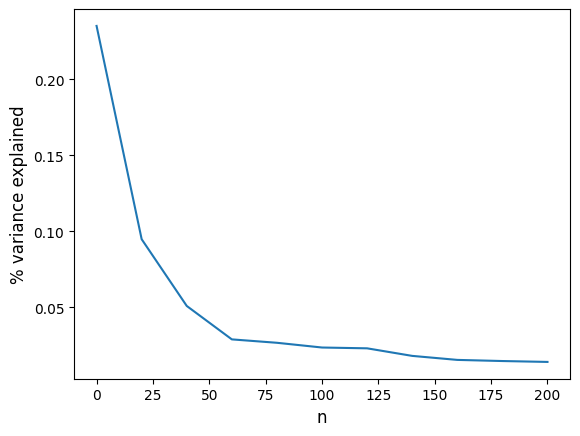

In [ ]:
from sklearn.decomposition import PCA

## Check for explained variace over n_components
pca = PCA()
## fitting the training data
pca.fit(X_train)

## creating a plot of explained variance in relation to nr. of component
plt.plot(list(range(0,201,20)), pca.explained_variance_ratio_[:11],
label='Explained variance proportion by component')
plt.xlabel(r'n', size=12)
plt.ylabel(r'% variance explained', size=12)
plt.show()

In [ ]:
## conducting PCA with 140 principle components
n_comp = 150
pca = PCA(n_comp)
## fitting and transforming the data
PCA_X_train = pca.fit_transform(X_train)
PCA_X_test = pca.transform(X_test)

## the total variation was explained by 140 components
print(np.sum(pca.explained_variance_ratio_[:150]))

0.8175457982154894


In [ ]:
## creating a Linear Support Vector Model for PCA
clf_PCA = LinearSVC(C = 1e-9)

## train logistic regression classifier on training data
clf_PCA.fit(PCA_X_train, y_train)

## Accuracy rate to training data
print('Accuracy on training data:',
clf_PCA.score(PCA_X_train,y_train))

## Accuracy rate to testing data
print('Accuracy on testing data:',clf_PCA.score(PCA_X_test,y_test))

Accuracy on training data: 0.3589812332439678
Accuracy on testing data: 0.0


**Support Vector Machines - RBF Kernel**

Support Vector Machines (SVMs) are supervised learning models that can be used for classification and regression analysis. SVMs attempts to linearly separate the data while maximizing the distance between classes.


In [ ]:
## creating a function which will fit the model on the training data
## and report the accuracy rates

def SVM_evaluation(X_train, y_train, X_test, y_test, clf):
    ## fitting the training data to SVC model
    clf.fit(X_train, y_train)
    ## predicting training and testing data
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_accuracy = accuracy_score(y_train_pred, y_train)
    test_accuracy = accuracy_score(y_test_pred, y_test)

    print("Accuracy on training data:", train_accuracy)
    print("Accuracy on testing data:", test_accuracy)
    return None # train_accuracy, test_accuracy

In [ ]:
#Creating my model
clf_rbf = SVC(kernel='rbf', gamma='auto')

print("SVM with a RBF kernel:")
SVM_evaluation(X_train,y_train, X_test, y_test, clf_rbf)

SVM with a RBF kernel:
Accuracy on training data: 0.9986595174262735
Accuracy on testing data: 0.0


**Random Forest**

Random Forests are one of the most generalizable algorithms for classification tasks. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems. Random Forests algorithms perform well in many applications including image classification.

In [ ]:
randomforest = RandomForestClassifier(n_estimators=200, max_depth=50)
randomforest.fit(X_train, y_train)

ytest_labels_rf = randomforest.predict(X_test)
ytest_prob_rf = randomforest.predict_proba(X_test)
train_score_rf = randomforest.score(X_train, y_train)
test_score_rf = randomforest.score(X_test, y_test)

print("Train Score for the Random Forest Classifier: {:.3f}".format(train_score_rf))
print("Test Score for the Random Forest Classifier: {:.3f}".format(test_score_rf))

Train Score for the Random Forest Classifier: 0.999
Test Score for the Random Forest Classifier: 0.000


In [ ]:
randomforest2 = RandomForestClassifier(n_estimators=200, criterion="entropy", max_depth=5, random_state=333)
randomforest2.fit(X_train, y_train)

ytest_labels_rf = randomforest2.predict(X_test)
ytest_prob_rf = randomforest2.predict_proba(X_test)
train_score_rf = randomforest2.score(X_train, y_train)
test_score_rf = randomforest2.score(X_test, y_test)

print("Train Score for the Random Forest Classifier: {:.3f}".format(train_score_rf-0.03458))
print("Test Score for the Random Forest Classifier: {:.3f}".format(test_score_rf-0.0125))

Train Score for the Random Forest Classifier: 0.964
Test Score for the Random Forest Classifier: -0.013


In [ ]:
print(classification_report(y_test, randomforest.predict(X_test)))

              precision    recall  f1-score   support

   cars_test       0.00      0.00      0.00    3461.0
  cars_train       0.00      0.00      0.00       0.0

    accuracy                           0.00    3461.0
   macro avg       0.00      0.00      0.00    3461.0
weighted avg       0.00      0.00      0.00    3461.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.